## Parte 1 - K-Means na prática

## Exemplo com K-Means

In [ ]:
## Carrega as bibliotecas que serão usadas
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets

#Essas próprias bibliotecas possuem bases de dados

#https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

iris = datasets.load_iris()
X = iris.data[:, [0,2]]
#Instância o algoritmo
kmeans = KMeans(n_clusters=3, random_state = 0, n_init="auto").fit(X)
y_kmeans = kmeans.fit_predict(X)

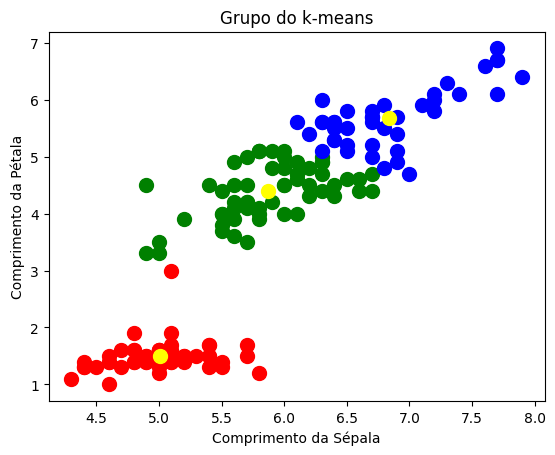

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='blue', label='Cluster 3')

#centroide
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label= 'Centroids')

plt.title('Grupo do k-means')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Comprimento da Pétala')

plt.show()

## Dados  - Spotify

[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Como o spotify consegue recomendar novas músicas para ouvirmos com base em outras músicas previas a qual escutamos?

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track

Sistemas de recomendação: são mecanismos capazes de analisar e compreender o comportamento dos usuários de uma plataforma para fazer recomendações relevantes e personalizadas de conteúdos novos.

### Dicionário dos dados

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

# Parte 2 - K-Means na prática

## Análise dos dados

**Bases usadas**

* [Dados gerais de músicas](https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv)

In [ ]:
#Importa as bibliotecas pandas e numpy
import pandas as pd
import numpy as np

In [ ]:
#Lê um arquivo CSV que contém dados totais e atribui a variável dados
dados = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv')

### Dados

In [ ]:
#Exibe apenas as duas primeiras linhas do dataframe dados
dados.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [ ]:
dados.shape

(20311, 19)

In [ ]:
#Retorna uma lista dos anos únicos presentes na coluna "year" do dataframe
dados["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
#Retorna uma lista dos artistas únicos presentes na coluna "artists" do dataframe
dados.artists.unique()

array(['Coldplay', 'OutKast', 'Linkin Park', '3 Doors Down', 'Eminem',
       'Disturbed', 'Nelly', '*NSYNC', 'Britney Spears', 'Shaggy',
       'The Beatles', 'Lifehouse', 'Sam Cooke', 'Limp Bizkit', 'Deftones',
       'U2', 'Ludacris', 'Godsmack', 'Christina Aguilera',
       'A Perfect Circle', 'Joe', 'Ja Rule', 'Rage Against The Machine',
       'Matchbox Twenty', 'Erykah Badu', 'Enya',
       'Mindless Self Indulgence', 'Mudvayne', 'Backstreet Boys',
       'Joan Sebastian', 'Radiohead', 'Los Tucanes De Tijuana', 'Sade',
       'Nelly Furtado', 'Musiq Soulchild', 'Three 6 Mafia', 'Phoenix',
       'Frédéric Chopin', 'Jagged Edge', 'JAY-Z', 'The Offspring',
       'Jill Scott', 'Switchfoot', 'Gillian Welch', 'Hank Williams',
       'DAngelo', 'Modest Mouse', 'Los Cadetes De Linares',
       'The Avalanches', 'Johnny Cash', 'Avant', 'Ryan Adams',
       'Los Originales De San Juan', 'Thievery Corporation',
       'Mariah Carey', 'Jimmy Eat World', 'Train', 'Papa Roach', 'Weezer',
  

In [ ]:
dados.shape #Obtem a dimensão do dataframe dados (linhas X colunas)

(20311, 19)

In [ ]:
#Remove as colunas "explicit", "key" e "mode" do dataframe dados
dados = dados.drop(['explicit', 'key', 'mode'], axis=1)

In [ ]:
dados.shape #Retorna a nova forma (dimensão) do dataframe dados

(20311, 16)

In [ ]:
#Verifica a contagem de valores nulos em cada coluna do dataframe dados
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
dados.isna().sum() #Verifica a contagem de valores ausentes (NaN) em cada coluna do dataframe dados

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
import plotly.express as px #Importa o módulo plotly.express e atribui a ele um apelido px

In [ ]:
dados_anos=dados[['year', 'valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness','loudness','speechiness']]
dados_anos.head()

,year,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
0,2000,0.285,0.00239,0.429,0.661,0.000121,0.2340,-7.227,0.0281
1,2000,0.613,0.14300,0.843,0.806,0.000000,0.0771,-5.946,0.2690
2,2000,0.400,0.00958,0.556,0.864,0.000000,0.2090,-5.870,0.0584
3,2000,0.543,0.00664,0.545,0.865,0.000011,0.1680,-5.708,0.0286
4,2000,0.760,0.03020,0.949,0.661,0.000000,0.0454,-4.244,0.0572


In [ ]:
dados_anos=dados_anos.groupby(by=['year'],as_index=False).mean()

In [ ]:
dados_anos.head(21)

,year,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
0,2000,0.540026,0.269358,0.582802,0.627074,0.099208,0.200786,-8.089236,0.093906
1,2001,0.526851,0.266935,0.577559,0.638105,0.118260,0.189763,-8.191369,0.091974
2,2002,0.529074,0.264441,0.564101,0.654841,0.095305,0.196347,-7.412277,0.080870
3,2003,0.507468,0.247809,0.564377,0.662383,0.095191,0.199530,-7.326575,0.097173
4,2004,0.508201,0.253359,0.552572,0.659352,0.069316,0.211564,-7.483531,0.099685
5,2005,0.512382,0.222959,0.574385,0.672505,0.088869,0.195812,-6.960131,0.104489
6,2006,0.489243,0.246365,0.545906,0.679126,0.063841,0.197450,-6.717081,0.087880
7,2007,0.495804,0.214177,0.551018,0.693095,0.072662,0.191550,-6.682876,0.080037
8,2008,0.503037,0.212786,0.576137,0.684368,0.046571,0.207719,-6.396823,0.077090
9,2009,0.486217,0.243804,0.550751,0.677436,0.064368,0.210127,-6.851884,0.084268


In [ ]:
fig = px.line(dados_anos, x="year", y="loudness", markers= True, title='Variação do Loudness/Volume em dB conforme os anos') #Cria um gráfico de linha interativo usando o plotly.express com base nos dados do dataframe dados_anos
fig.show() #Exibe o gráfico interativo

In [ ]:
import plotly.graph_objects as go #Importa o módulo plotly.graph_objects e atribui a ele um apelido go

In [ ]:
fig = go.Figure() #Cria uma nova instância de figura vazia usando a classe go.Figure() do módulo plotly.graph_objects

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos (no eixo x) e os valores de "acousticness" (no eixo y) ao longo do tempo
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos e os valores de "valence" ao longo do tempo
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos e os valores de "danceability" ao longo do tempo
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos e os valores de "energy" ao longo do tempo
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos e os valores de "instrumentalness" ao longo do tempo
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos e os valores de "liveness" ao longo do tempo
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness')) #Adiciona um traço de linha ao gráfico fig, ele representa a relação entre os anos e os valores de "speechiness" ao longo do tempo

fig.show()

<Axes: >

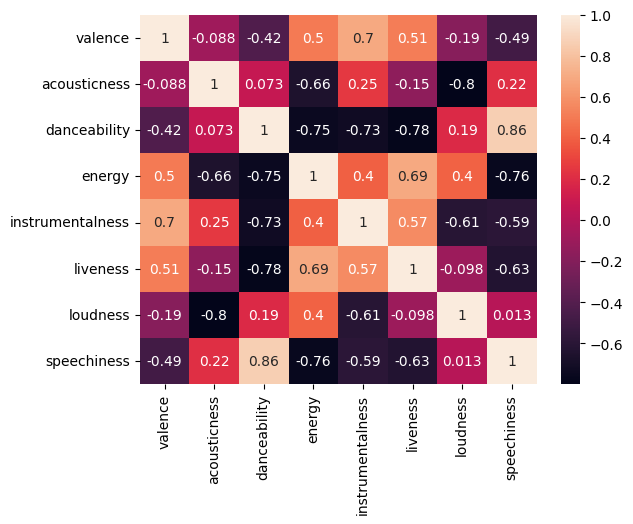

In [ ]:
import seaborn as sns
%matplotlib inline

sns.heatmap(dados_anos.drop(['year'], axis=1).corr(), annot=True)

#A correlação é útil quando o valor está próximo do 1 ou do -1. Ou seja, 1, a medida que uma varia a outra tbm. -1 signfica que estão caminhando na direção oposta.

# Parte 3 - K-Means na prática

## Clusterização por música

In [ ]:
#Remove as colunas 'duration_ms' e 'popularity'
dados = dados.drop(['duration_ms', 'popularity'], axis = 1)

In [ ]:
#Retorna a contagem de ocorrências de cada valor único na coluna 'artists' do DataFrame dados
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [ ]:
#Retorna a contagem de ocorrências de cada valor único na coluna 'artists_song' do DataFrame dados
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [ ]:
#Importa a classe OneHotEncoder do módulo sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

#Cria uma instância do objeto OneHotEncoder com o parâmetro dtype definido como int
ohe = OneHotEncoder(dtype = int)
#Aplica o OneHotEncoder aos dados da coluna "artists" do DataFrame dados e armazena o resultado na variável colunas_ohe

colunas_ohe = ohe.fit_transform(dados[['artists']])
column_name = ohe.get_feature_names_out(['artists'])

#Cria um novo DataFrame chamado dados2 a partir do DataFrame dados, removendo a coluna 'artists'
dados2 = dados.drop('artists',axis=1)
one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(colunas_ohe, columns=column_name)

#Concatena o DataFrame dados2 com um novo DataFrame criado a partir das variáveis fictícias geradas pelo OneHotEncoder. Armazenado no DataFrame dados_musica_dummies
dados_musica_dummies = pd.concat([dados2,one_hot_encoded_frame], axis=1)
#Exibe os dados
dados_musica_dummies


,valence,year,acousticness,danceability,energy,id,instrumentalness,liveness,loudness,name,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,I Don't Think I'm Okay,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,Timeless Interlude,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,Sunblind,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,NASTY GIRL / ON CAMERA,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados.shape #Retorna a dimensão do DataFrame dados

(20311, 14)

##Redução de dimensionalidade com PCA

In [ ]:
#Importa a classe Pipeline (Procedimento sequêncial) do módulo sklearn.pipeline
from sklearn.pipeline import Pipeline
#Importa a classe StandardScaler do módulo sklearn.preprocessing
#StandardScaler coloca os dados em uma escala numérica padronizada em valores em torno de zero
# importante para algoritmos conseguirem trabalhar com todas variáveis de maneira igual
from sklearn.preprocessing import StandardScaler
#Importa a classe PCA do módulo sklearn.decomposition
from sklearn.decomposition import PCA

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte **n_components** podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.


In [ ]:
#Define o valor de SEED
SEED = 1234
#Define a semente para o gerador de números aleatórios
np.random.seed(SEED)
#Escalona os dados usando o StandardScaler e reduz o dimensionalidade usando o PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('PCA', PCA(n_components = 0.75, random_state = SEED))])

#Aplica o pipeline pca_pipeline aos dados contidos no DataFrame dados2,
#mas antes remove as colunas 'id', 'name' e 'artists_song'


music_embedding_pca = pca_pipeline.fit_transform(dados_musica_dummies.drop(['id', 'name','artists_song'], axis=1))


#Cria um novo DataFrame chamado projection_m a partir dos dados contidos na variável music_embedding_pca
projection_m = pd.DataFrame(data = music_embedding_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [ ]:
#Retorna o número de componentes principais selecionados pelo objeto PCA no pipeline pca_pipeline
pca_pipeline[1].n_components_

657

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum() #Retorna a soma cumulativa da proporção de variância explicada pelos componentes principais retidos no modelo PCA

0.7510584160118419

In [ ]:
#Exibe os dados
projection_m

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
0,0.263941,-2.432627,-0.588740,-0.220144,-0.571115,-0.468763,-1.347218,1.654591,-0.320767,-0.647643,...,-1.287661e-13,-7.422287e-13,1.395595e-12,-4.407235e-13,-3.809619e-13,3.952705e-13,-6.748973e-14,1.044595e-12,1.114860e-13,-0.007366
1,-1.297919,0.374777,2.375343,2.200183,0.054774,-1.792643,-1.039669,-0.003787,-0.130510,1.557552,...,-1.730679e-12,-1.259849e-12,7.063238e-13,-5.138905e-13,5.121217e-13,7.790636e-13,-1.329307e-12,8.734310e-13,-3.044641e-12,0.044402
2,-0.853986,-1.977157,0.456581,0.747415,-0.423633,-0.825951,1.179401,0.639655,-0.276269,1.189022,...,-4.632819e-13,-1.803672e-13,5.645011e-13,3.208834e-13,4.479802e-13,-3.459631e-13,-2.463920e-13,-1.158408e-13,5.358935e-13,0.000868
3,-0.882291,-2.255648,0.923747,-0.209767,-0.086270,-1.461981,-0.365577,0.615510,0.857525,0.459966,...,-3.309766e-12,-5.096804e-12,1.427137e-11,-3.504217e-12,-3.273799e-12,-1.186731e-12,-2.104810e-12,7.206438e-13,4.945920e-12,-0.058170
4,-1.628130,0.544552,2.080687,1.330777,0.185572,-1.245743,0.042831,0.151316,-0.974537,0.385573,...,-3.688519e-13,-1.234085e-13,4.700015e-13,-5.446784e-14,-3.276726e-15,1.642227e-13,-2.173652e-13,3.312932e-13,-7.153232e-13,0.007009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.591166,1.477884,-1.516980,-2.010911,-0.409875,0.040517,0.361092,-0.127216,-1.000809,-0.064246,...,9.263498e-12,-3.254994e-12,-1.820033e-11,6.055804e-12,4.507005e-12,3.715208e-12,1.178920e-11,-2.080873e-11,-1.801343e-11,0.226514
20307,1.464578,1.621902,-1.845928,-0.392920,-0.810134,1.399761,-1.649241,0.163150,0.291980,-1.114310,...,-9.695291e-12,1.558519e-12,8.941246e-12,-5.112682e-12,-1.762855e-12,5.585311e-12,-5.844605e-12,1.140687e-11,4.520493e-12,-0.076135
20308,0.870021,0.659622,-0.805613,-1.506622,-0.660144,-0.963832,0.537412,-0.522568,-0.466078,-0.380223,...,1.455141e-11,-3.587352e-12,-1.855415e-11,-1.160667e-11,-1.255745e-11,1.419348e-13,1.442785e-12,3.385343e-12,-4.189773e-11,0.406128
20309,0.185275,3.145567,-0.871932,0.773866,0.904800,-0.095223,-1.251633,0.555692,1.153322,0.183238,...,-2.488444e-11,2.952866e-11,8.777380e-12,-1.586923e-11,-8.926856e-12,6.289960e-12,-7.910519e-12,5.798727e-12,-1.087309e-12,-0.107649


## Aplicação do cluster com K-Means

In [ ]:
from sklearn.cluster import KMeans #Importa a classe KMeans do módulo sklearn.cluster

In [ ]:
#Cria um objeto de clustering utilizando o algoritmo K-Means
kmeans_pca_pipeline = KMeans(n_clusters=50,verbose=False, random_state=SEED)
#Executa o algoritmo K-Means no conjunto de dados projection_m usando o objeto kmeans_pca_pipeline criado anteriormente
kmeans_pca_pipeline.fit(projection_m)

#Adiciona uma nova coluna chamada 'cluster_pca' ao DataFrame dados
dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

#Adiciona uma nova coluna chamada 'cluster_pca' ao DataFrame projection_m
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#Adiciona uma nova coluna chamada 'artists' ao DataFrame projection_m, contendo os valores da coluna 'artists' do DataFrame dados
projection_m['artists'] = dados['artists']
#Adiciona uma nova coluna chamada 'song' ao DataFrame projection_m, contendo os valores da coluna 'artists_song' do DataFrame dados
projection_m['song'] = dados['artists_song']
#Adiciona uma nova coluna chamada 'id' ao DataFrame projection_m, contendo os valores da coluna 'id' do DataFrame dados
projection_m['id'] = dados['id']

In [ ]:
projection_m #Exibe os dados

,0,1,2,3,4,5,6,7,8,9,...,651,652,653,654,655,656,cluster_pca,artists,song,id
0,0.263941,-2.432627,-0.588740,-0.220144,-0.571115,-0.468763,-1.347218,1.654591,-0.320767,-0.647643,...,-3.809619e-13,3.952705e-13,-6.748973e-14,1.044595e-12,1.114860e-13,-0.007366,2,Coldplay,Coldplay - Yellow,3AJwUDP919kvQ9QcozQPxg
1,-1.297919,0.374777,2.375343,2.200183,0.054774,-1.792643,-1.039669,-0.003787,-0.130510,1.557552,...,5.121217e-13,7.790636e-13,-1.329307e-12,8.734310e-13,-3.044641e-12,0.044402,35,OutKast,OutKast - Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV
2,-0.853986,-1.977157,0.456581,0.747415,-0.423633,-0.825951,1.179401,0.639655,-0.276269,1.189022,...,4.479802e-13,-3.459631e-13,-2.463920e-13,-1.158408e-13,5.358935e-13,0.000868,27,Linkin Park,Linkin Park - In the End,60a0Rd6pjrkxjPbaKzXjfq
3,-0.882291,-2.255648,0.923747,-0.209767,-0.086270,-1.461981,-0.365577,0.615510,0.857525,0.459966,...,-3.273799e-12,-1.186731e-12,-2.104810e-12,7.206438e-13,4.945920e-12,-0.058170,27,3 Doors Down,3 Doors Down - Kryptonite,6ZOBP3NvffbU4SZcrnt1k6
4,-1.628130,0.544552,2.080687,1.330777,0.185572,-1.245743,0.042831,0.151316,-0.974537,0.385573,...,-3.276726e-15,1.642227e-13,-2.173652e-13,3.312932e-13,-7.153232e-13,0.007009,46,Eminem,Eminem - The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.591166,1.477884,-1.516980,-2.010911,-0.409875,0.040517,0.361092,-0.127216,-1.000809,-0.064246,...,4.507005e-12,3.715208e-12,1.178920e-11,-2.080873e-11,-1.801343e-11,0.226514,27,Bazzi,Bazzi - I Don't Think I'm Okay,0PUkanqCGTb6qseXPKOw1F
20307,1.464578,1.621902,-1.845928,-0.392920,-0.810134,1.399761,-1.649241,0.163150,0.291980,-1.114310,...,-1.762855e-12,5.585311e-12,-5.844605e-12,1.140687e-11,4.520493e-12,-0.076135,27,Bryson Tiller,Bryson Tiller - Timeless Interlude,6Iw6fQVKZi0fWtEQBrTFcP
20308,0.870021,0.659622,-0.805613,-1.506622,-0.660144,-0.963832,0.537412,-0.522568,-0.466078,-0.380223,...,-1.255745e-11,1.419348e-13,1.442785e-12,3.385343e-12,-4.189773e-11,0.406128,27,Fleet Foxes,Fleet Foxes - Sunblind,308prODCCD0O660tIktbUi
20309,0.185275,3.145567,-0.871932,0.773866,0.904800,-0.095223,-1.251633,0.555692,1.153322,0.183238,...,-8.926856e-12,6.289960e-12,-7.910519e-12,5.798727e-12,-1.087309e-12,-0.107649,27,Gunna,Gunna - NASTY GIRL / ON CAMERA,2f8y4CuG57UJEmkG3ujd0D


## Analisando o cluster

In [ ]:
fig = px.scatter(projection_m, x=0, y=1,
                 color='cluster_pca', hover_data=[0, 1, 'song']) #Cria um gráfico de dispersão usando o Plotly Express (px)
fig.show() #Exibe o gráfico na saída

# Parte 4 - Listando Recomendações

## Recomendação da música

In [ ]:
#Cria uma variável chamada nome_musica e atribui a ela a string 'Coldplay - Yellow'
nome_musica = 'Coldplay - Yellow'
#Cria uma nova variável chamada selecao que contém uma série booleana.

selecao = projection_m['song'] == nome_musica

#Atribui à variável cluster o valor do cluster ao qual a música especificada por nome_musica pertence

cluster = list(projection_m[selecao]['cluster_pca'])[0]
cluster #Exibe o dado

2

In [ ]:
#Atualiza a variável selecao para uma série booleana que indica quais linhas do DataFrame projection_m
#pertencem ao mesmo cluster identificado anteriormente

selecao = projection_m['cluster_pca'] == cluster

#cria um novo DataFrame chamado musicas_recomendadas
musicas_recomendadas = projection_m[selecao][[0,1,'song','id']]
#Exibe os dados
musicas_recomendadas

,0,1,song,id
0,0.263941,-2.432627,Coldplay - Yellow,3AJwUDP919kvQ9QcozQPxg
10,2.940797,-1.324736,Coldplay - Sparks,7D0RhFcb3CrfPuTJ0obrod
54,0.820183,-1.698829,Coldplay - Trouble,0R8P9KfGJCDULmlEoBagcO
74,0.596971,-1.443183,Coldplay - Don't Panic,2QhURnm7mQDxBb5jWkbDug
88,0.247430,-2.299730,Coldplay - Shiver,0qksx8mV28lztYIZ1om8ml
...,...,...,...,...
16612,-0.093891,-0.425225,Coldplay - Ink,6c6W25YoDGjTq3qSPOga5t
18234,0.848119,-1.014862,Coldplay - True Love,0fQuzbQNLcD1ofo7B2NcFI
18261,0.719967,-1.292434,Coldplay - Birds,3HWDWyIqWuLsTHECx9DvXF
19301,0.928924,-2.853136,Coldplay - Yes,04zfFfRMXegKi4mMkGMeze


In [ ]:
nome_musica = 'Coldplay - Yellow' #Atribui a string 'Coldplay - Yellow' a variável nome_musica
selecao = projection_m['song'] == nome_musica #Atualiza a variável selecao para uma série booleana que indica quais linhas do DataFrame projection_m correspondem à música especificada por nome_musica

#Atribui à variável x_musica o valor da coordenada x (primeira coordenada) da música especificada por nome_musica

x_musica = list(projection_m[selecao][0])[0]

#Atribui à variável y_musica o valor da coordenada y (segunda coordenada) da música especificada por nome_musica
y_musica = list(projection_m[selecao][1])[0]

In [ ]:
#Importa a função euclidean_distances do módulo pairwise do pacote sklearn.metrics e a renomeia como ed
from sklearn.metrics.pairwise import euclidean_distances as ed

In [ ]:
#Calcula as distâncias euclidianas entre as coordenadas x e y das músicas recomendadas (musicas_recomendadas) e as coordenadas x e y da música especificada (x_musica e y_musica)

distancias = ed(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])

#Adiciona uma nova coluna chamada 'distancias' ao DataFrame musicas_recomendadas e atribui a ela os valores armazenados na variável distancias
musicas_recomendadas['distancias'] = distancias
 #Ordena o DataFrame musicas_recomendadas com base na coluna 'distancias' em ordem crescente e seleciona as 10 primeiras linhas
recomendadas = musicas_recomendadas.sort_values('distancias').head(10)
recomendadas #Exibe os dados

,0,1,song,id,distancias
0,0.263941,-2.432627,Coldplay - Yellow,3AJwUDP919kvQ9QcozQPxg,0.000000
88,0.247430,-2.299730,Coldplay - Shiver,0qksx8mV28lztYIZ1om8ml,0.133919
351,0.452217,-2.188740,Coldplay - In My Place,2nvC4i2aMo4CzRjRflysah,0.308105
3067,0.654298,-2.630680,Coldplay - Spies,2mLgOcRkEgq89j8WstUpui,0.437725
14149,-0.117996,-1.992368,Coldplay - Low,1BBtng1KOF0JuC6bSNgGmp,0.582841
12297,0.597266,-1.891981,Coldplay - Square One,2zQIITgo6sc5ppOfPcH205,0.635140
12299,0.420661,-1.742716,Coldplay - White Shadows,0WWz2AaqxLoO0fa9ou6Fqc,0.707487
10569,-0.170209,-1.868815,Coldplay - Life in Technicolor ii,0VpFFXnT2kNjqJmTv57aZi,0.711597
6611,0.338147,-1.709327,Coldplay - Charlie Brown,1yqMgZNrevsWMLWfO2PRp5,0.727097
16108,0.319791,-1.661497,Coldplay - Cemeteries of London,03uqdEuopXPSCg4MvgA2fI,0.773150


## Biblioteca Spotipy

In [ ]:
!pip install spotipy #Instala a biblioteca Spotipy no ambiente atual

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
import spotipy #Importa a biblioteca Spotipy
from spotipy.oauth2 import SpotifyOAuth #Importa a classe SpotifyOAuth do módulo oauth2 da biblioteca Spotipy
from spotipy.oauth2 import SpotifyClientCredentials #importa a classe SpotifyClientCredentials do módulo oauth2 da biblioteca Spotipy

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

https://developer.spotify.com/

In [ ]:
client_credentials_manager = SpotifyClientCredentials(
client_id = #Insira o seu id aqui
client_secret= #Insira aqui

) #Autentica Python na API do Spotify usando o fluxo de autenticação baseado em credenciais do cliente
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager) #Representa uma conexão autenticada com a API do Spotify

Imagem do álbum

https://p.scdn.co/mp3-preview/c0d9119dc69cae75baf6463e21e43f433fdf5ff4?cid=178d2761f1064a05bb5e3051248c75ab


Text(0.5, 0, 'Yellow')

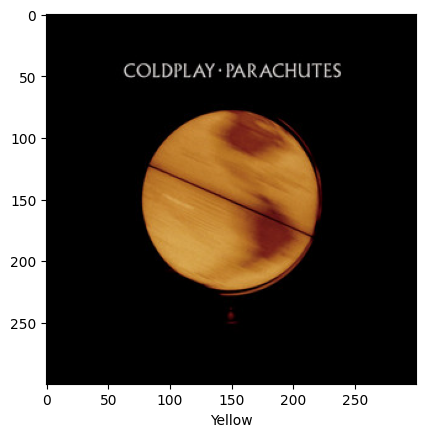

In [ ]:
import matplotlib.pyplot as plt #Importa a biblioteca matplotlib e especificamente o módulo pyplot
from skimage import io #Importa o módulo io da biblioteca scikit-image (skimage)
#Atribui a string 'Coldplay - Yellow' a variável nome_musica
nome_musica='Coldplay - Yellow'
#Atualiza a variável selecao para uma série booleana que indica quais linhas do DataFrame dados correspondem à música especificada por nome_musica
selecao = dados['artists_song'] == nome_musica
id = dados[selecao]['id'][0] #Atribui à variável id o valor da coluna 'id' do DataFrame dados para a primeira linha em que a variável selecao é verdadeira
track = sp.track(id) #Utiliza a biblioteca Spotipy para fazer uma solicitação à API do Spotify e obter informações detalhadas sobre uma música específica, identificada pelo ID fornecido na variável id
url=track['album']['images'][1]["url"] #Obtém a URL da imagem da capa do álbum da música, a partir do objeto track retornado pela solicitação à API do Spotify
name=track['name'] #Atribui o nome da música obtido do objeto track à variável name
print(track['preview_url']) #Exibe a URL de pré-visualização da música, que permite reproduzir um trecho da música no Spotify
image = io.imread(url) #Lê a imagem da capa do álbum da música a partir da URL especificada e armazenando-a na variável image
plt.imshow(image) #Exibe a imagem armazenada na variável
plt.xlabel(name, fontsize=10) #Define o rótulo do eixo x no gráfico com o valor da variável name como texto e define o tamanho da fonte do rótulo para 10

# Parte 5 - Recomendador

In [ ]:
#Recomenda músicas com base em uma lista de IDs de músicas da playlist
def recommend_id(playlist_id):
  url = ''
  name = ''
  previa = ''
  for i in playlist_id:
    track = sp.track(i)
    url=track["album"]["images"][1]["url"]
    name=track["name"]
    previa=track['preview_url']

    plt.figure(figsize = (6, 3))
    image = io.imread(url)
    plt.imshow(image)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

    plt.xticks(color = 'w', fontsize = 0.01)
    plt.xlabel(name, fontsize = 8)
    plt.show()
    print(previa)

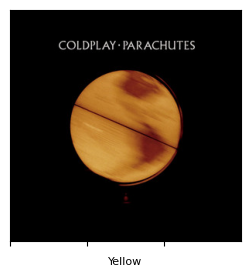

https://p.scdn.co/mp3-preview/c0d9119dc69cae75baf6463e21e43f433fdf5ff4?cid=178d2761f1064a05bb5e3051248c75ab


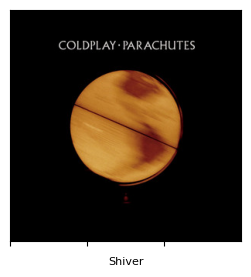

https://p.scdn.co/mp3-preview/e5fbbfe9d4b7b84c9a48b2bd4d2c00b72fd8f149?cid=178d2761f1064a05bb5e3051248c75ab


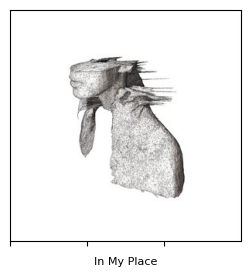

https://p.scdn.co/mp3-preview/601677ed6c8fa893554bd225a488aa21d5181730?cid=178d2761f1064a05bb5e3051248c75ab


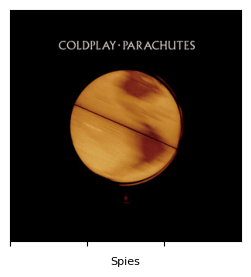

https://p.scdn.co/mp3-preview/dda60bc553dbd6cd47d0c41e9aa4af71bd0798fe?cid=178d2761f1064a05bb5e3051248c75ab


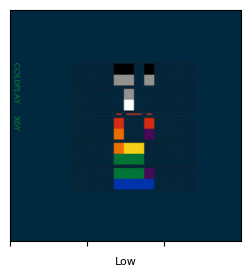

https://p.scdn.co/mp3-preview/6a32e7ba3061d46853f46bcd79bb2bf1e4173487?cid=178d2761f1064a05bb5e3051248c75ab


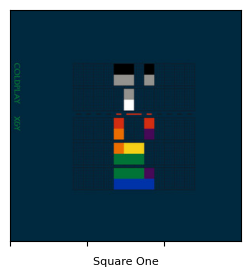

https://p.scdn.co/mp3-preview/c71c050e0091ac0a5adb480cdb5378d69f78aff3?cid=178d2761f1064a05bb5e3051248c75ab


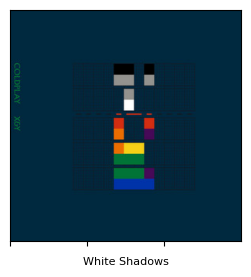

https://p.scdn.co/mp3-preview/82fbd4338fe59388ca5625fabd540fc0e0fe930c?cid=178d2761f1064a05bb5e3051248c75ab


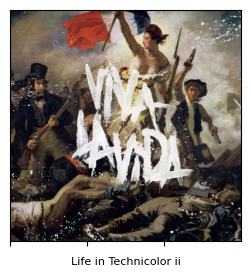

https://p.scdn.co/mp3-preview/9033a4ff4ebef1fbe0f46c4fc316cbfbb820c9d2?cid=178d2761f1064a05bb5e3051248c75ab


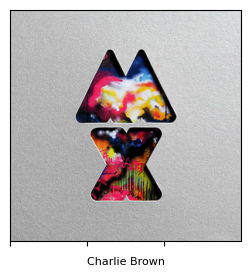

https://p.scdn.co/mp3-preview/e0af2d50a09d4de440c3f86f5c08ea357c7fc3a2?cid=178d2761f1064a05bb5e3051248c75ab


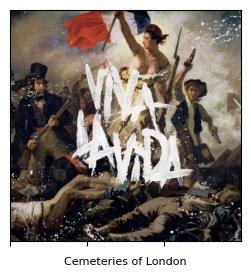

https://p.scdn.co/mp3-preview/73fd5a22ba44f4d492c654c0e7fe3657f405366e?cid=178d2761f1064a05bb5e3051248c75ab


In [ ]:
recommend_id(recomendadas['id'])